In [3]:
from py2neo import Graph
import matplotlib.pyplot as plt
from tabulate import tabulate

In [4]:
graph = Graph(
    "bolt://localhost:7687",
    auth=("neo4j", "admin"),
    # name="neo4j-2",
)

In [47]:
def plot_distribution(data):
    plt.bar(data.keys(), data.values())

def plot_ratings_distribution():
    results = graph.run("""
        match (u:User)-[r:RATES]-(m:Movie)
        return r.rating as rating, count(r) as count order by r.rating
    """).data()
    ratings_dict = { rat["rating"]: rat["count"] for rat in results }
    plot_distribution(ratings_dict)

def plot_ratings_per_user_distribution():
    results = graph.run("""
        MATCH (u:User)-[r:RATES]-(m)
        with u, count(r) as counter
        return u.username as username, counter order by counter desc;
    """).data()
    ratings_dict = { rat["username"]: rat["counter"] for rat in results }
    plot_distribution(ratings_dict)

def plot_ratings_per_movie_distribution():
    results = graph.run("""
        MATCH (u:User)-[r:RATES]-(m)
        WITH m, count(r) as counter
        RETURN m.id as id, counter order by counter desc;
    """).data()
    ratings_dict = { rat["id"]: rat["counter"] for rat in results }
    plot_distribution(ratings_dict)

def count_graph():
    movies = graph.run("match (m:Movie) return count(m)").evaluate()
    users = graph.run("match (u:User) return count(u)").evaluate()
    ratings = graph.run("match (u:User)-[r:RATES]-(m:Movie) return count(r)").evaluate()
    average_ratings_per_user = graph.run("""
        MATCH (u:User)
        WITH u, size((u)-[:RATES]-()) as rateCount
        RETURN avg(rateCount) as averageRateCount
    """).evaluate()
    average_ratings_per_movie = graph.run("""
        MATCH (m:Movie)
        WITH m, size((m)-[:RATES]-()) as rateCount
        RETURN avg(rateCount) as averageRateCount
    """).evaluate()
    print(tabulate([[
        movies,
        users,
        ratings,
        average_ratings_per_movie,
        average_ratings_per_user
    ]], headers=["Movies", "Users", "Ratings", "Average ratings per movie", "Average ratings per user"]))

def get_graph_statistics():
    plot_ratings_distribution()
    count_graph()

def delete_random_ratings(rating: int, lim=100):
    graph.run(f"""
        match (u:User)-[r:RATES {{ rating: {rating} }}]-(m:Movie)
        with r, rand() as rand order by rand limit {lim}
        detach delete r;
    """)

def delete_unrated_movies():
    graph.run("""
    match (m:Movie) where not (:User)-[:RATES]-(m) detach delete (m);
    """)

def delete_unconnected_nodes():
    graph.run("""
    match (m) where not ()-[]-(m) detach delete (m);
    """)

def delete_random_users(lim=100):
    graph.run(f"""
        match (u:User)
        with u, rand() as rand
        order by rand limit {lim}
        detach delete u
    """)

### Starting from the 550K ratings version of the graph 

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     565154                      152.538                     60.5544


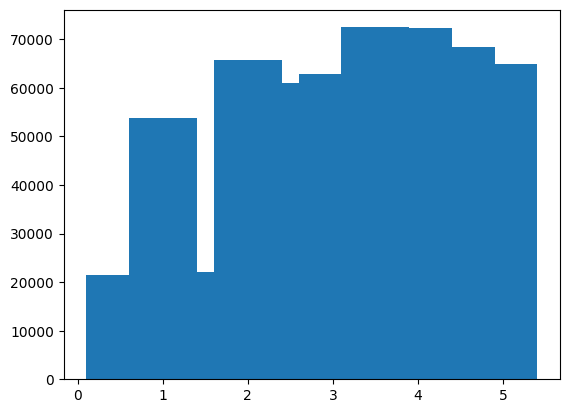

In [6]:
get_graph_statistics()

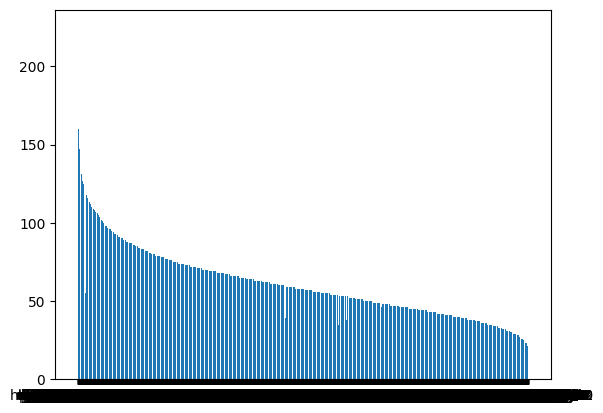

In [7]:
plot_ratings_per_user_distribution()

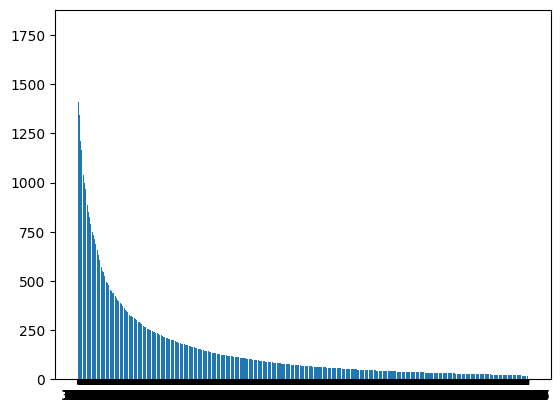

In [8]:
plot_ratings_per_movie_distribution()

### Applying multiple steps to reduce its size

In [9]:
delete_random_ratings(rating=3, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     555154                      149.839                     59.4829


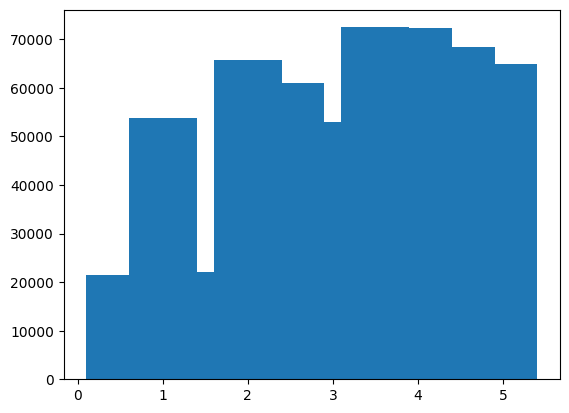

In [10]:
get_graph_statistics()

In [11]:
delete_random_ratings(rating=3.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     545154                       147.14                     58.4114


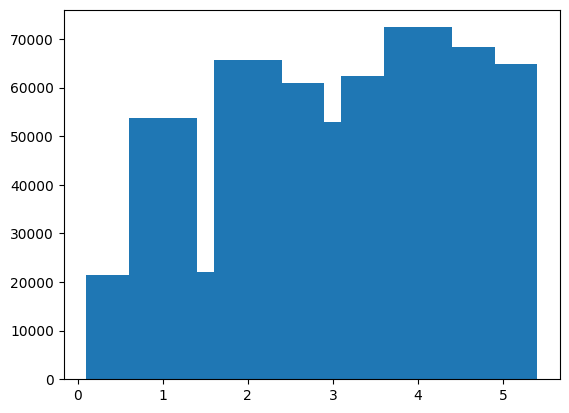

In [12]:
get_graph_statistics()

In [13]:
delete_random_ratings(rating=4.5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     535154                      144.441                       57.34


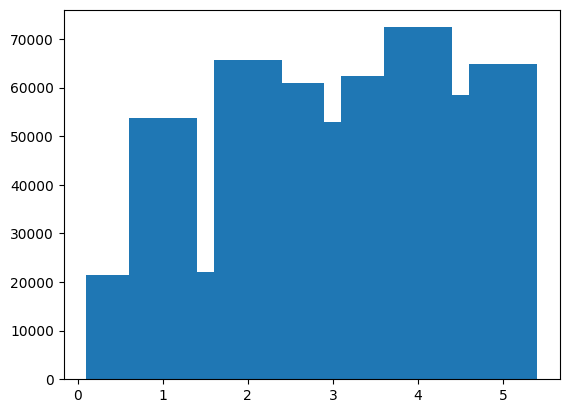

In [14]:
get_graph_statistics()

In [15]:
delete_random_ratings(rating=4, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     525154                      141.742                     56.2685


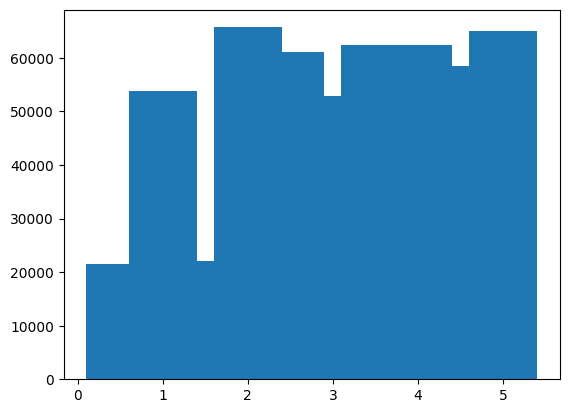

In [16]:
get_graph_statistics()

In [17]:
delete_random_ratings(rating=2, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     515154                      139.043                      55.197


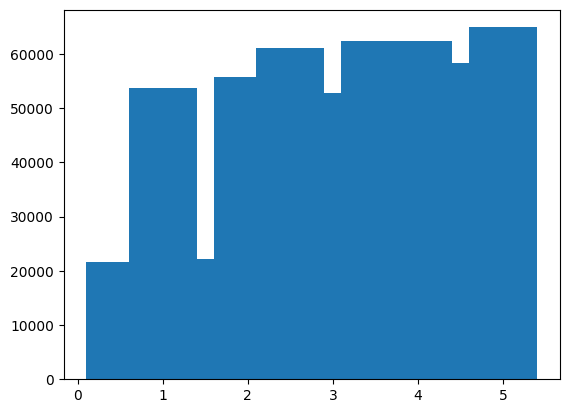

In [18]:
get_graph_statistics()

In [19]:
delete_random_ratings(rating=2.5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     495154                      133.645                     53.0541


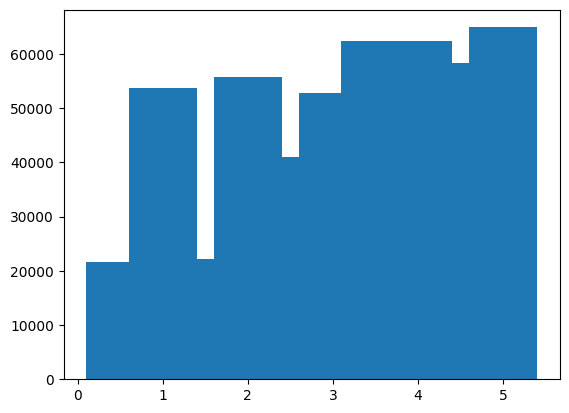

In [20]:
get_graph_statistics()

In [21]:
delete_random_ratings(rating=3.5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     475154                      128.247                     50.9112


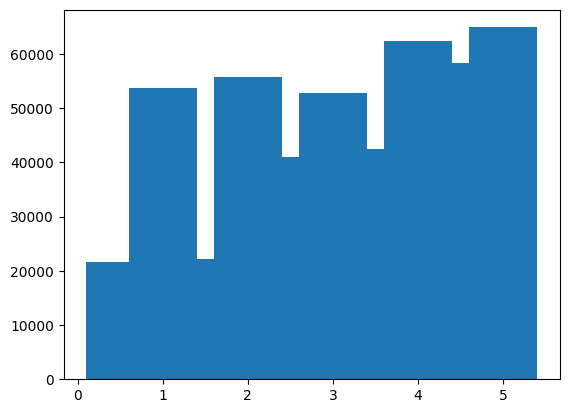

In [22]:
get_graph_statistics()

In [23]:
delete_random_ratings(rating=5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     455154                      122.849                     48.7682


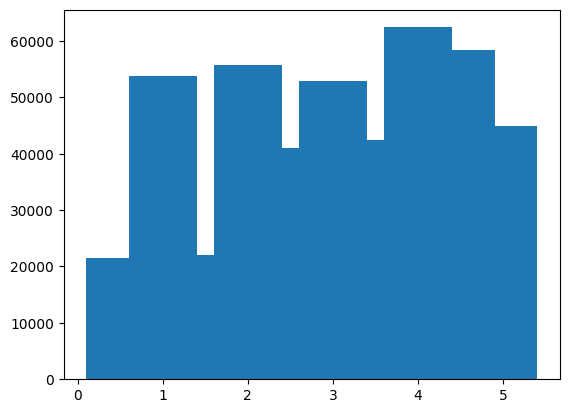

In [24]:
get_graph_statistics()

In [25]:
delete_random_ratings(rating=4, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     435154                       117.45                     46.6253


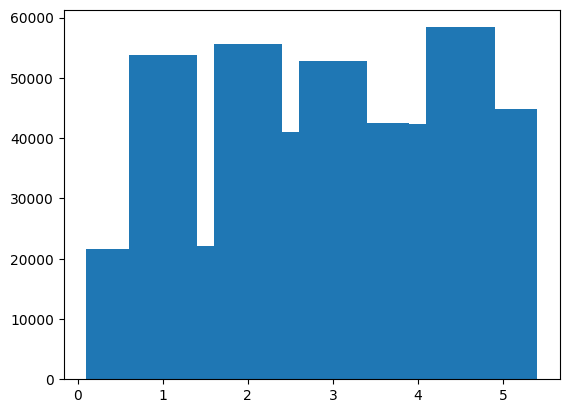

In [26]:
get_graph_statistics()

In [27]:
delete_random_ratings(rating=4.5, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     415154                      112.052                     44.4824


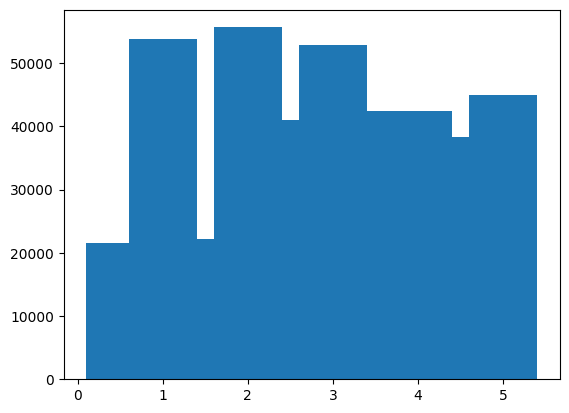

In [28]:
get_graph_statistics()

In [29]:
delete_random_ratings(rating=1, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     405154                      109.353                     43.4109


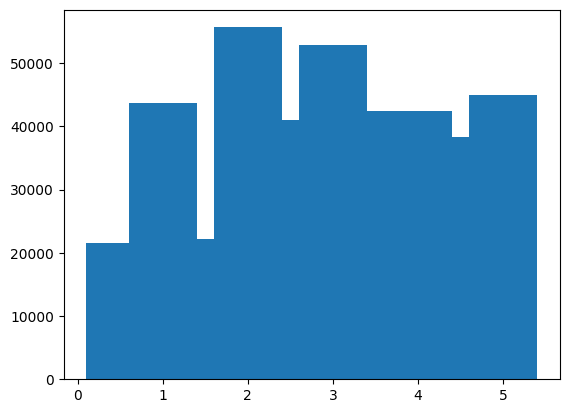

In [30]:
get_graph_statistics()

In [31]:
delete_random_ratings(rating=2, lim=20000)

In [32]:
delete_random_ratings(rating=3, lim=20000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     365154                      98.5571                      39.125


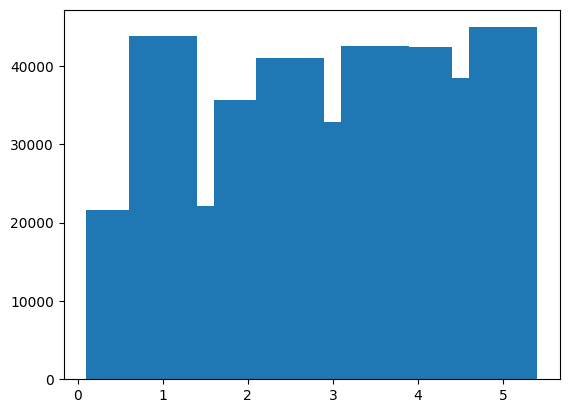

In [33]:
get_graph_statistics()

In [34]:
delete_random_ratings(rating=1, lim=10000)
delete_random_ratings(rating=3, lim=10000)
delete_random_ratings(rating=3.5, lim=10000)
delete_random_ratings(rating=4, lim=10000)
delete_random_ratings(rating=5, lim=10000)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     315154                      85.0618                     33.7677


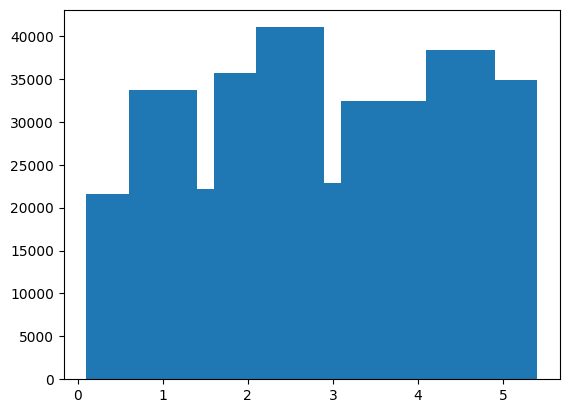

In [35]:
get_graph_statistics()

In [36]:
delete_random_ratings(rating=2.5, lim=15000)

In [41]:
delete_unrated_movies()

In [43]:
delete_unconnected_nodes()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9333     300154                      81.0132                     32.1605


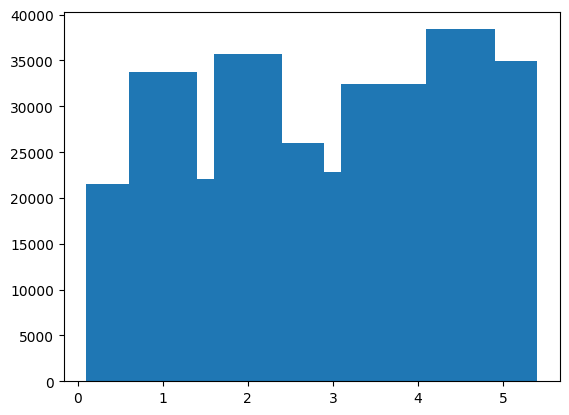

In [44]:
get_graph_statistics()

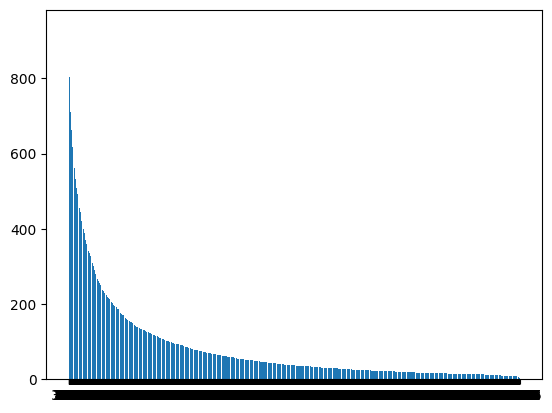

In [45]:
plot_ratings_per_movie_distribution()

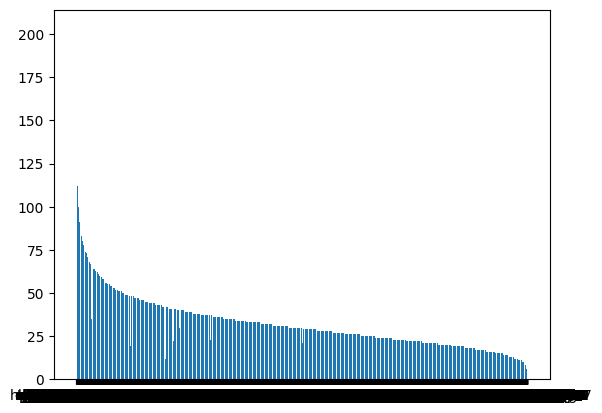

In [46]:
plot_ratings_per_user_distribution()

#### Deleting some random users

In [48]:
delete_random_users(100)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     9233     296871                      80.1271                     32.1533


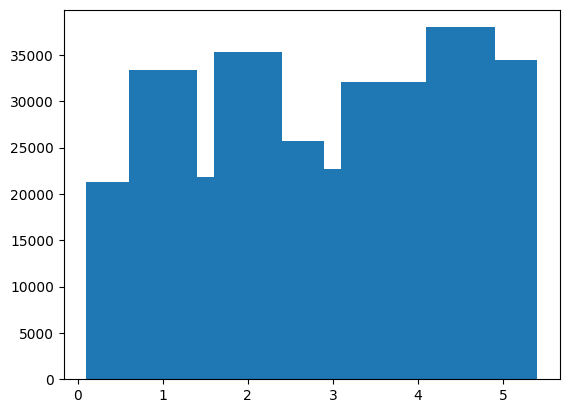

In [49]:
get_graph_statistics()

In [50]:
delete_random_users(500)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     8733     281007                      75.8453                     32.1776


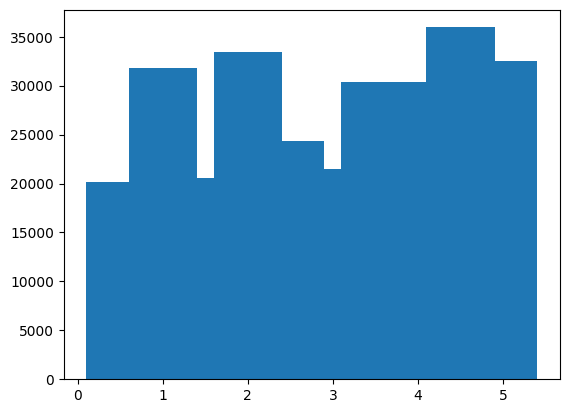

In [51]:
get_graph_statistics()

In [52]:
delete_random_users(100)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     8633     277860                       74.996                     32.1858


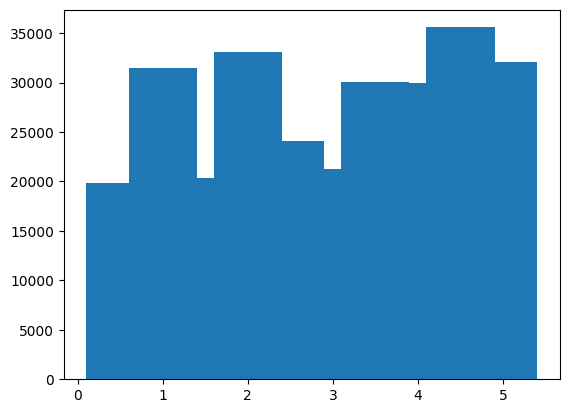

In [53]:
get_graph_statistics()

In [54]:
delete_random_users(300)

In [57]:
delete_unconnected_nodes()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     8333     268414                      72.4464                      32.211


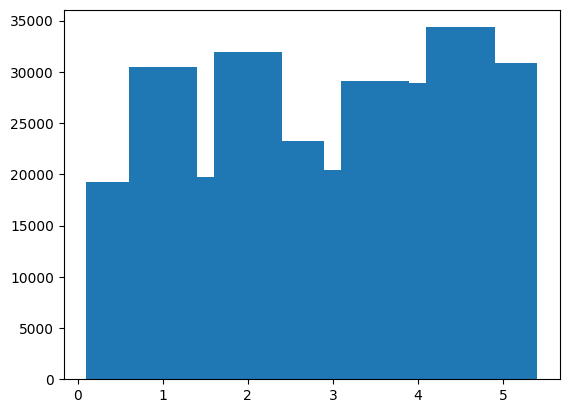

In [58]:
get_graph_statistics()

In [59]:
delete_random_users(200)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     8133     262298                      70.7957                     32.2511


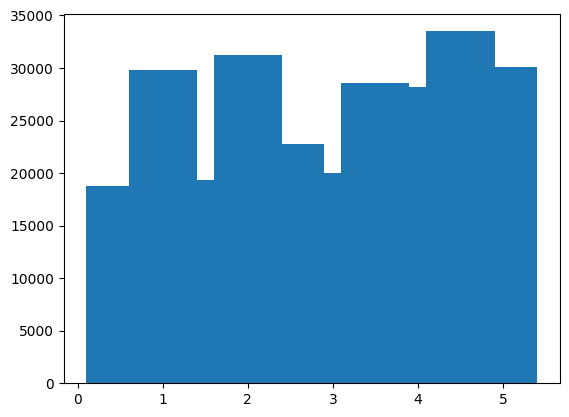

In [60]:
get_graph_statistics()

In [61]:
delete_random_users(200)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     7933     255797                       69.041                     32.2447


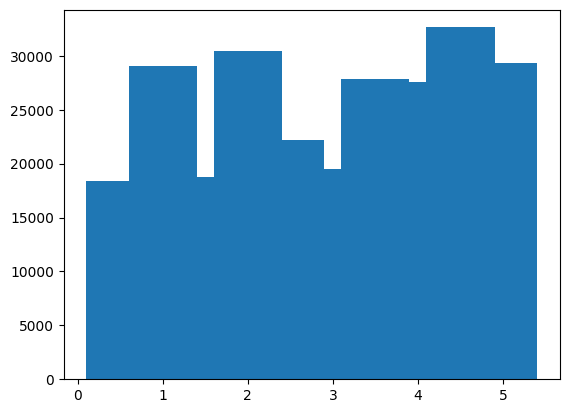

In [62]:
get_graph_statistics()

In [63]:
delete_random_users(400)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     7533     242967                      65.5781                     32.2537


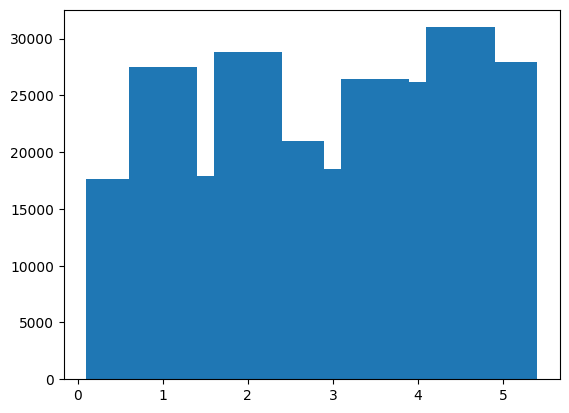

In [64]:
get_graph_statistics()

In [65]:
delete_random_users(200)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     7333     236896                      63.9395                     32.3055


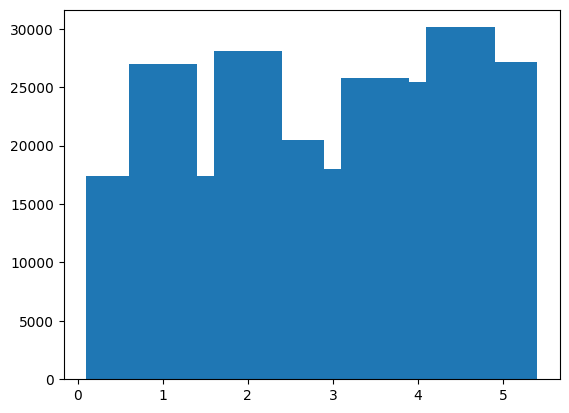

In [66]:
get_graph_statistics()

In [67]:
delete_random_users(200)

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     7133     230155                      62.1201                     32.2662


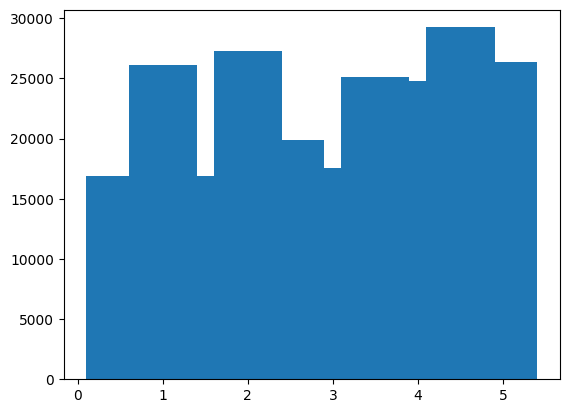

In [68]:
get_graph_statistics()

In [69]:
delete_random_users(300)

In [70]:
delete_unconnected_nodes()

  Movies    Users    Ratings    Average ratings per movie    Average ratings per user
--------  -------  ---------  ---------------------------  --------------------------
    3705     6833     220379                      59.4815                     32.2522


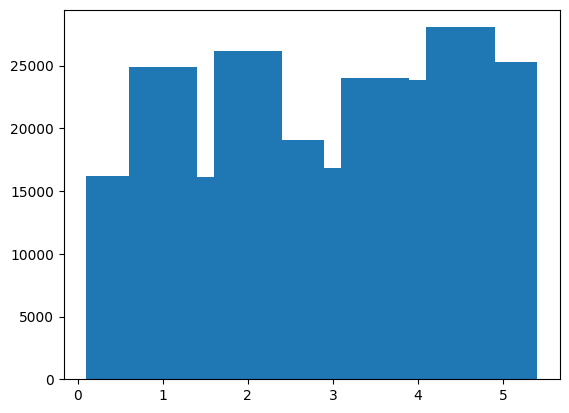

In [71]:
get_graph_statistics()

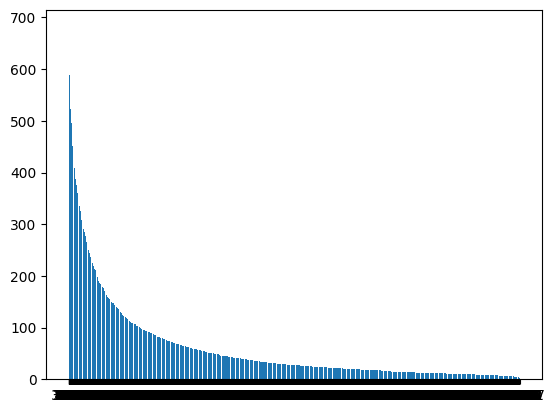

In [72]:
plot_ratings_per_movie_distribution()

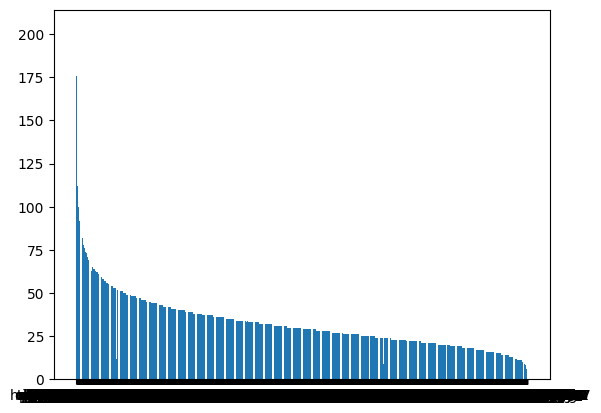

In [73]:
plot_ratings_per_user_distribution()